# Project: Exploring No-Show Appointment Data from Brazil Clinic

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We will be analyzing data from over 110,000 patients who either did or did not show up to their doctor's appointment along with a variety of other data points including their age, gender, neighborhood medical conditions they may have had, the day they scheduled their appointment and the day that their appointment actually took place on.

Some interesting questions we could ask based on this dataset are:
* Were there more no show's than people who showed up to their appointments?
* Which gender is more likely to show up to their appointment?
* What age groups are most likely to show up for their appointment?
* Which medical condition is more likely to show up to their appointment?

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import scipy as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

-----

* First let's get a look at our data

---

In [3]:
#importing our csv
appts = pd.read_csv('C:\\Users\\chels\\Downloads\\BrazilProject\\noshow.csv')
appts.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


---

* Now let's check if we have any duplicate data

___

In [4]:
#checking for the sum of duplicate data in csv
sum(appts.duplicated())

0

---

* So there is no duplicate data, let's now check for any NaN/null values

---

In [5]:
#scanning for NaN/null values and returning the sum
pd.isna(appts).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

---

* It seems we do not have any NaN/null values
* For clarity's sake and to avoid mistakes down the line I will now rename columns with incorrect spelling

---

In [6]:
#renaming columns hipertension and handcap to appropriate spellings and to follow a convention
appts.rename(columns={"Hipertension": "Hypertension", "Handcap": "Handicap", "No-show": "NoShow"}, inplace=True)

In [7]:

appts.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


---

* Now I will remove SMS received, Neighborhood, AppointmentDay, ScheduledDay, AppointmentID, PatientID and Scholarship columns as that data is not relevant to our questions

---

In [8]:
#removing columns unrelated to our questions
appts.drop(columns={"Scholarship", "SMS_received", "PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"}, inplace=True)

---

* Now let's give our columns nice easy variable names to work with

---

In [9]:
gender = appts["Gender"]
age = appts["Age"]
hypertension = appts["Hypertension"]
diabetes = appts["Diabetes"]
alcoholism = appts["Alcoholism"]
handicap = appts["Handicap"]
no_show = appts["NoShow"]

---

* Now let's look at our data types and see if there is anything we would like to change

---

In [10]:
#checking data types
appts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Hypertension   110527 non-null  int64 
 4   Diabetes       110527 non-null  int64 
 5   Alcoholism     110527 non-null  int64 
 6   Handicap       110527 non-null  int64 
 7   NoShow         110527 non-null  object
dtypes: int64(5), object(3)
memory usage: 6.7+ MB


---

* Looking at this I see a few things I could change to make the data easier to work with. First I will change the No-Show Yes and No to false and true because boolean data is easier to work with in Python. I will also be changing the 0's and 1's in the medical conditions to true and false to make it easier to work with in python.

---

In [11]:
#replacing Yes with False and No with True to make data easier to manipulate
appts.replace(to_replace="No", value=True, inplace=True, limit=None, regex=False, method='pad')
appts.replace(to_replace="Yes", value=False, inplace=True, limit=None, regex=False, method='pad')

In [12]:
#replacing all 0's with False and 1's with True in the medical conditions to make data easier to manipulate
hypertension.replace(to_replace=0, value=False, inplace=True, limit=None, regex=False, method='pad')
hypertension.replace(to_replace=1, value=True, inplace=True, limit=None, regex=False, method='pad')
diabetes.replace(to_replace=0, value=False, inplace=True, limit=None, regex=False, method='pad')
diabetes.replace(to_replace=1, value=True, inplace=True, limit=None, regex=False, method='pad')
alcoholism.replace(to_replace=0, value=False, inplace=True, limit=None, regex=False, method='pad')
alcoholism.replace(to_replace=1, value=True, inplace=True, limit=None, regex=False, method='pad')
handicap.replace(to_replace=0, value=False, inplace=True, limit=None, regex=False, method='pad')
handicap.replace(to_replace=1, value=True, inplace=True, limit=None, regex=False, method='pad')

---

* Now let's take a look at our data

---

In [13]:
appts.head(10)

,Gender,Age,Neighbourhood,Hypertension,Diabetes,Alcoholism,Handicap,NoShow
0,F,62,JARDIM DA PENHA,True,False,False,False,True
1,M,56,JARDIM DA PENHA,False,False,False,False,True
2,F,62,MATA DA PRAIA,False,False,False,False,True
3,F,8,PONTAL DE CAMBURI,False,False,False,False,True
4,F,56,JARDIM DA PENHA,True,True,False,False,True
5,F,76,REPÚBLICA,True,False,False,False,True
6,F,23,GOIABEIRAS,False,False,False,False,False
7,F,39,GOIABEIRAS,False,False,False,False,False
8,F,21,ANDORINHAS,False,False,False,False,True
9,F,19,CONQUISTA,False,False,False,False,True


In [14]:
appts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Hypertension   110527 non-null  bool  
 4   Diabetes       110527 non-null  bool  
 5   Alcoholism     110527 non-null  bool  
 6   Handicap       110527 non-null  object
 7   NoShow         110527 non-null  bool  
dtypes: bool(4), int64(1), object(3)
memory usage: 3.8+ MB


----

* It looks like our data is all ready to work with!

---

<a id='eda'></a>
## Exploratory Data Analysis

## Which groups are more likely to show up to their appointments?

### Were their more show or no show appointments?

---

* First let's take a look at how many show vs no shows we have for our appointments

---

In [15]:
#getting counts of no show vs show with True meaning that the patient did not show up and False meaning the patient did show up
show_status = no_show.value_counts()
show_status

True    88208
Yes     22319
Name: NoShow, dtype: int64

<AxesSubplot:title={'center':'No Show Status'}>

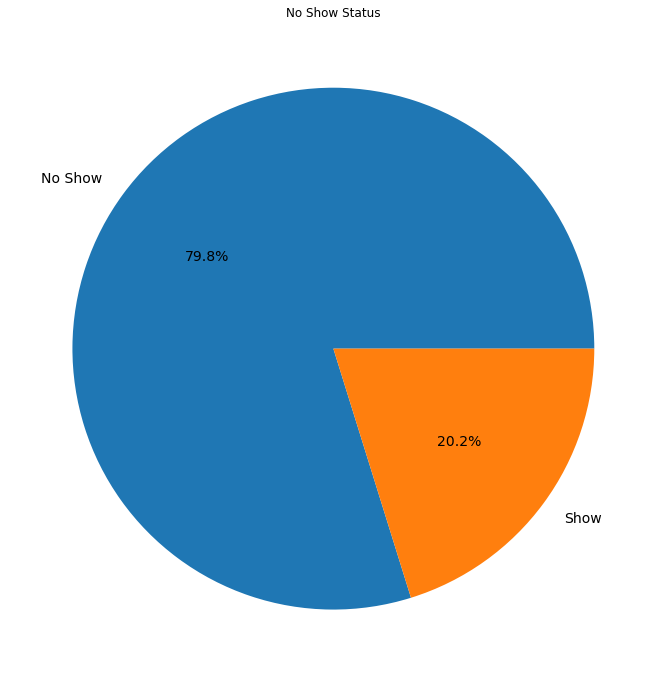

In [16]:
show_status.plot(kind="pie", autopct='%.1f%%', labels=['No Show','Show'], title='No Show Status', ylabel='', fontsize="14", figsize=(20,12))

---

* From this we can see that a great deal more patients did not show up to their appointments than the ones that did

---

### Which gender is more likely to show up to their appointment?

----

* Here we will explore which gender is most likely to show up to their appointments. First we will figure out how members of each gender made appointments in the first place.

---

In [17]:
#counting occurrances of each gender
gender_count = gender.value_counts()
gender_count

F    71840
M    38687
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Appointments by Gender'}>

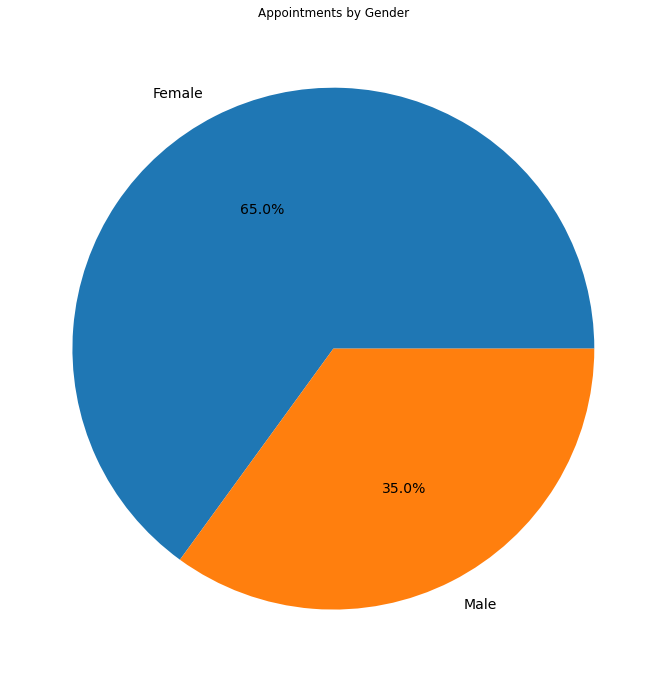

In [18]:
#graphing findings
gender_count.plot(kind="pie", autopct='%.1f%%',  title='Appointments by Gender', ylabel='', figsize=(20,12), fontsize="14", labels=['Female', 'Male'])

---

* Looking at the above pie chart, we can see we have a much larger sample of women here than men with women making up 65% of the total appointments made and men making up only 35% of the total appointments made. 
* Now let's see as a percentage of the whole, which gender is more likely to show up after having made an appointment to do that we will group no show appointments by gender and divide that number by the total count of each gender
---

In [19]:
#Grouping total no show appointments by gender
noshow_by_gender = appts['NoShow'].groupby(appts['Gender']).sum()
noshow_by_gender

Gender
F    57246
M    30962
Name: NoShow, dtype: int64

In [20]:
#Getting the percentage of no shows by gender by dividing gender no shows by gender whole values
ttl_gender_noshow = noshow_by_gender/gender_count
ttl_gender_noshow

Gender
F    0.796854
M    0.800321
dtype: float64

<AxesSubplot:title={'center':'No Show by Gender'}>

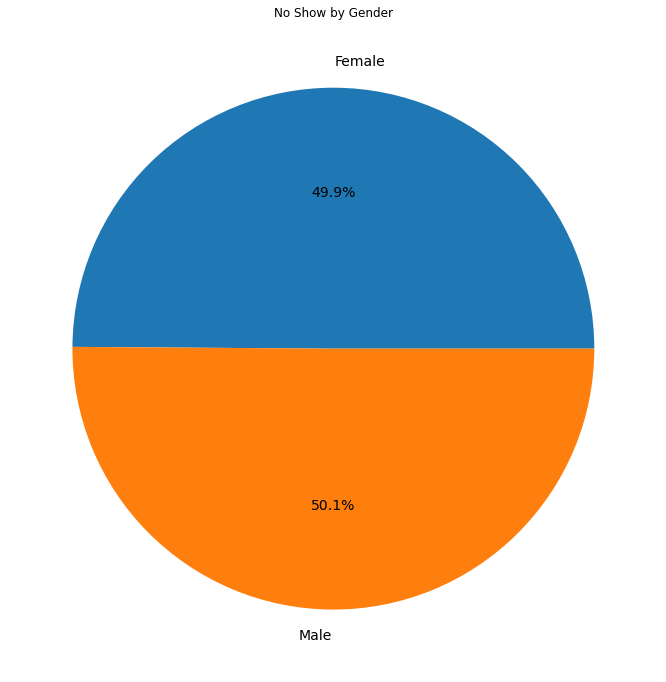

In [21]:
#graphing findings
ttl_gender_noshow.plot(kind="pie", autopct='%.1f%%',  title='No Show by Gender', ylabel='', figsize=(20,12), fontsize="14", labels=['Female', 'Male'])

---

* From the graph above we can see that about half of the women who booked an appointment and half of the men who booked an appointment showed up. 

---

### Which Age Group is more likely to show up to their appointment?

---

* Here we will try to figure out which age group is most and least likely to show up for the appointments. First we will figure out our age groups then divide the age group totals by those that did not show up.

---

In [22]:
#first we will find our minimum ago
min(age)

-1

---

* Does it make sense for someone to be -1 years old? Maybe, if the appointment is for someone in the womb that is what they would put. We will hold onto this data for that reason.

---

In [23]:
#finding max age
max(age)

115

In [24]:
#dividing age groups into bins 
age_bins = pd.IntervalIndex.from_tuples([(-1, 19), (20, 29), (30, 39), (40, 49), (50, 59), (60, 69), (70, 79), (80,115)])
age_vals = pd.cut(age, age_bins)

In [25]:
#grouping the ages by the age bins created
age_groups = appts['Age'].groupby(age_vals).sum()
age_groups

Age
(-1, 19]     256895
(20, 29]     306667
(30, 39]     478582
(40, 49]     577993
(50, 59]     783156
(60, 69]     676335
(70, 79]     388881
(80, 115]    243494
Name: Age, dtype: int64

<AxesSubplot:title={'center':'Appointments by Age Group'}, ylabel='Age'>

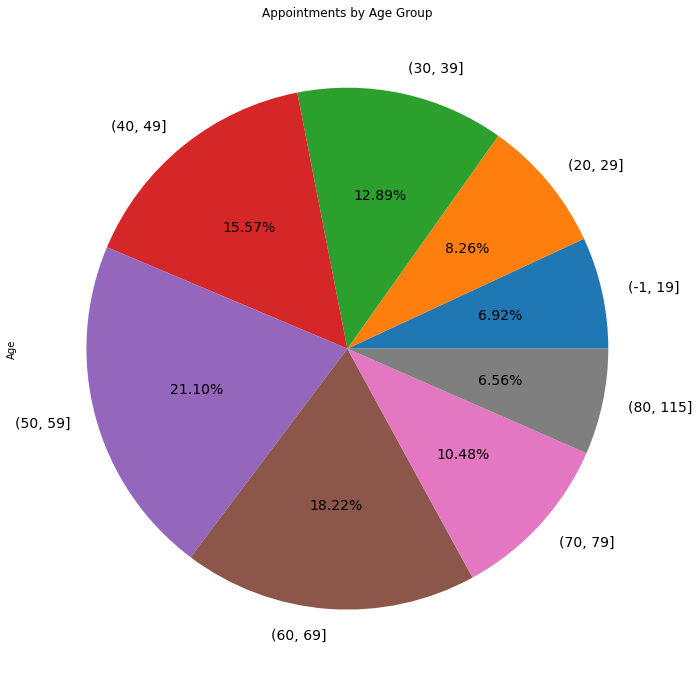

In [26]:
#graphing the values
age_groups.plot(kind="pie", autopct='%.2f%%', fontsize="14", figsize=(20,12), title="Appointments by Age Group")

<AxesSubplot:title={'center':'No Show by Age Group'}, ylabel='Frequency'>

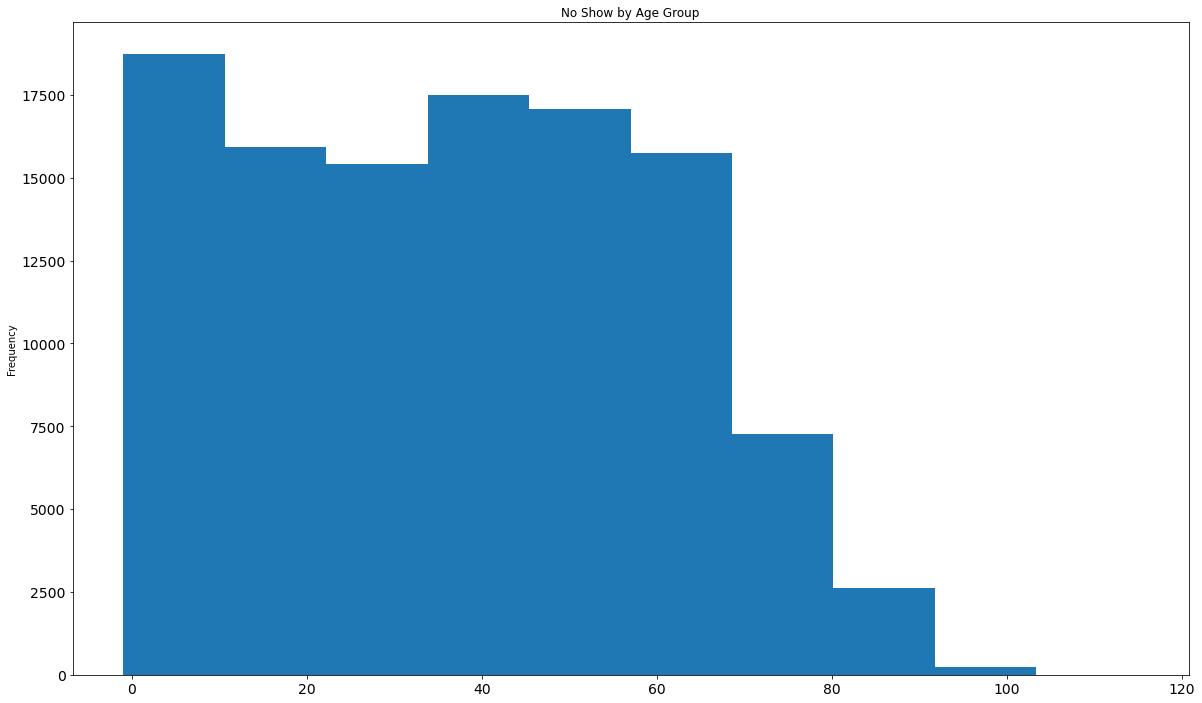

In [39]:
age.plot(kind="hist", fontsize="14", figsize=(20,12), title="No Show by Age Group", ylabel='')

---

* The pie chart chart gives us the appointments by age group in 10 year increments until we get over 80 as there are fewer appointment in 80-115
* OUr histogram gives us a different, continuous view of this data 
* From this we can infer that those in the age 50-59 range are the most likely to make appointments with the least likely age groups being 80-115 and -1 - 19. -1 to 19 is probably the most significant age group here being just a 11 year interval vs the 35 year interval of the 80+ age group.
* Next we will get the no shows by age group.

---

In [27]:
#grouping by no shows in the age groups we made before
noshow_by_age = appts['NoShow'].groupby(age_vals).sum()
noshow_by_age

Age
(-1, 19]     23670
(20, 29]      9237
(30, 39]     10719
(40, 49]     10228
(50, 59]     11765
(60, 69]      8911
(70, 79]      4402
(80, 115]     2383
Name: NoShow, dtype: int64

<AxesSubplot:title={'center':'No Show by Age Group'}>

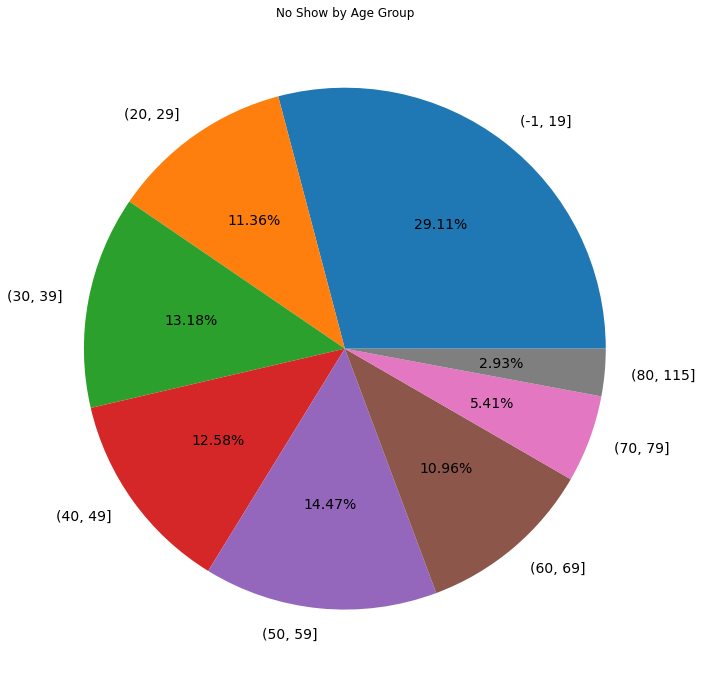

In [28]:
#graphing our results
noshow_by_age.plot(kind="pie", autopct='%.2f%%', fontsize="14", figsize=(20,12), title="No Show by Age Group", ylabel='', normalize=True)

---

* This chart shows our no shows by age group. As we can see the -1 - 19 age group is over represented in this data
* Next let's look at what percent of the total appointments of each age group were no shows

---

In [32]:
no_show_total = (noshow_by_age/age_groups)*100
no_show_total

Age
(-1, 19]     9.213881
(20, 29]     3.012062
(30, 39]     2.239742
(40, 49]     1.769572
(50, 59]     1.502255
(60, 69]     1.317542
(70, 79]     1.131966
(80, 115]    0.978669
dtype: float64

---

* The above list shows the percentage of each age group that did not show up to their appointment. Over 9% of appointments between age -1 - 19 did not show up making it by far the highest number with the next being just 3% of 20-29 year olds. The least amount of no shows was for the 80-115 age group and the 70-79 age group.

---

### Are any with listed ailments more or less likely to show up?

---

* Here we will look at the listed ailments of hypertension, diabtes, alcoholism and handicapped and see if any with these conditions are more or less likely to show up for their appointments.
* First we will find the appointments by ailment

---

In [515]:
#get total appointments by ailment
appt_by_ailment = appts[['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']].sum()
appt_by_ailment

Hypertension    21801
Diabetes         7943
Alcoholism       3360
Handicap         2459
dtype: object

<AxesSubplot:title={'center':'Appointment by Ailment'}>

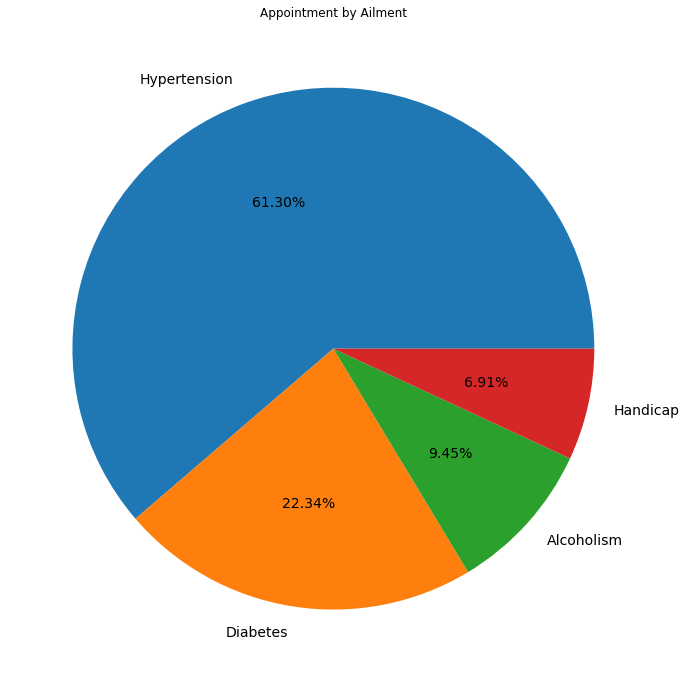

In [516]:
#graph appointment by ailment
appt_by_ailment.plot(kind="pie", autopct='%.2f%%', fontsize="14", figsize=(20,12), title="Appointment by Ailment", ylabel='', normalize=True)

---

* Here we can see that the bulk of appointments that listed a specific ailment were made by those with hypertension

---

In [517]:
#grouping our ailments by no show appointments and dividing the totals by the number of no shows
noshow_by_ailment = appts[['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']].groupby(appts['NoShow']).sum()
ailment_graph = (noshow_by_ailment[noshow_by_ailment['Hypertension'] == 3772]).sum()/(noshow_by_ailment[noshow_by_ailment['Hypertension'] == 18029]).sum()
ailment_graph

Hypertension    0.209218
Diabetes        0.219561
Alcoholism      0.252329
dtype: float64

<AxesSubplot:title={'center':'No Show by Ailment'}>

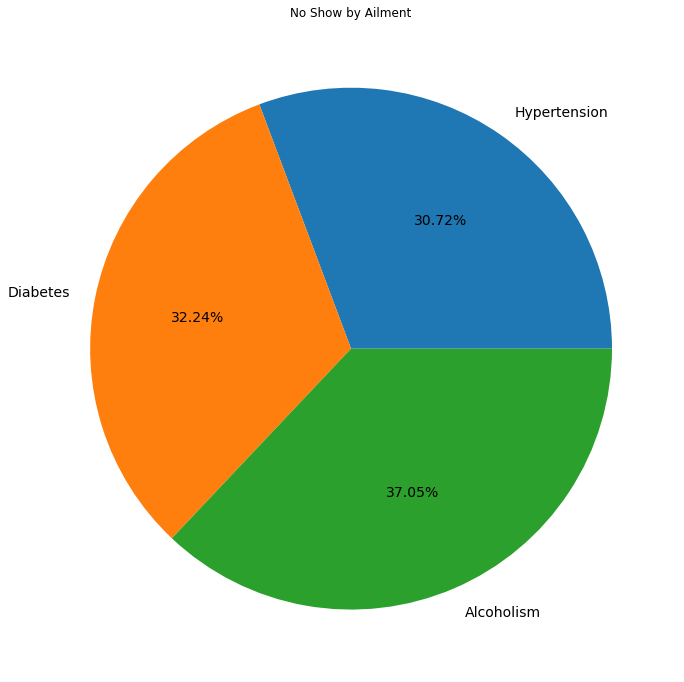

In [518]:
#graphing our results
ailment_graph.plot(kind="pie", autopct='%.2f%%', fontsize="14", figsize=(20,12), title="No Show by Ailment", ylabel='', normalize=True)

---

* This shows the distribution of no shows per ailment

----

<a id='conclusions'></a>
## Conclusions

Based only on the data we have on hand we could draw the following tentative conclusions

* It is possible that females are more likely to make appointments than males based on the overwhelmingly higher number of women who have appointments than men
* Despite the fact that so many more women made appointments than men, neither gender appears to be more likely to show up to their appointment
* Those in the 50-59 age range seem to be mostly likely to make appointments making up over 21% of the total appointments
* Those in the -1-19 range seem to be most likely to miss their appointment being less than 7% of the overall appointments and nearly 30% of the missed appointments.
* After 70 years of age the no shows seem to decrease
* Hypertension patients make up the bulk of the appointments by ailment but the least amount of no shows per ailment, suggesting hypertension patients are more likely to show up for these appointments.
* Alcoholics account for less than 10% of appointments but 37% of no shows suggesting they are less likely to show up for their appointments

These findings again are tentative and based only on this clinic, only on the data chosen, and only on the math performed in this analysis